In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
#Q1)
fifa=pd.read_csv('fifa.csv')

In [5]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
#Q3)
fifa['Value']=fifa['Value'].str.replace('€','')

In [7]:
#function for converting millions and thousands to float
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0
fifa['Value']=fifa['Value'].apply(value_to_float)

In [8]:
fifa['Wage']=fifa['Wage'].str.replace('€','')
fifa['Wage']=fifa['Wage'].apply(value_to_float)

In [9]:
fifa['Joined']=fifa['Joined'].str.split(',').str[-1].astype(float)
#taking only year out of joining and ignoring dates as it is only partially available

In [10]:
fifa.Joined

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

In [11]:
fifa['Contract Valid Until Year']=fifa['Contract Valid Until'].str.split(',').str[-1].astype(float)
#same as above, only taking years as we know players will mostly join after season ends(in summer) 
#as opposed to joining in the middle of a season

In [12]:
#function for converting height into centimeters
def cm_height(x):
    a,b=map(int,x.split("'"))
    b+=a*12
    return b*2.54
fifa['Height'].fillna("0'0",inplace=True)
#filling n/a values with zero so as to avoid errors
fifa['Height']=fifa['Height'].apply(cm_height)


In [13]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,2021.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,2022.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,2022.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2020.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,2023.0


In [14]:
fifa['Height'].replace(0,np.nan,inplace=True)
#converting n/a values(now zeros) back to n/a

In [15]:
fifa['Weight']=fifa['Weight'].str.replace('lbs','').astype(float)
#converting weight to float of pounds

In [16]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,2021.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,2022.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,2022.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2020.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,2023.0


In [17]:
fifa['Release Clause']=fifa['Release Clause'].str.replace('€','')
fifa['Release Clause']=fifa['Release Clause'].apply(value_to_float)
#same as value and wage

In [18]:
fifa.to_csv(r"C:\Users\rithwik's pc\Documents\DSE\NPV\mini project\fifa1_processed.csv")
#saving processed data as a new csv

In [3]:
fifa1=pd.read_csv('fifa1_processed.csv')
#reading the new file

In [20]:
#QUESTION1)

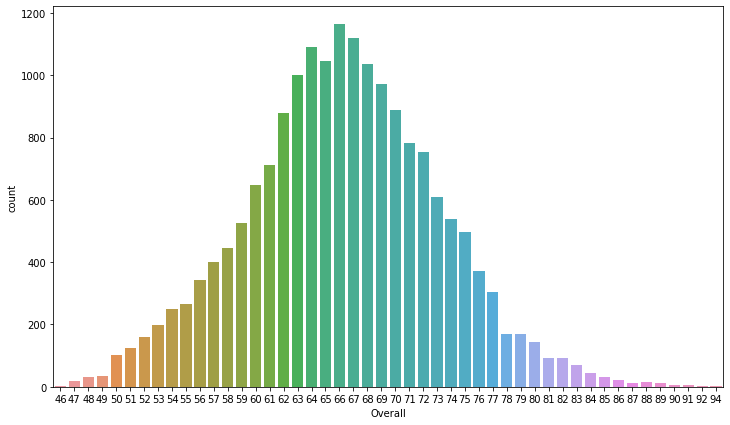

In [3]:
plt.figure(figsize=(12,7))
sns.countplot(fifa1.Overall)
plt.show()
#countplot for visualising overalls of players

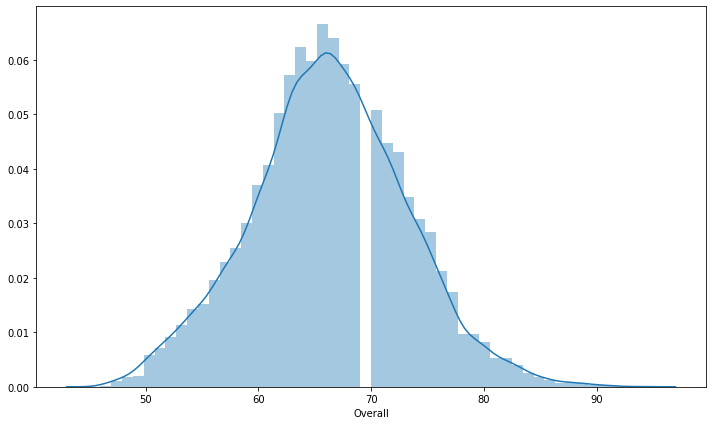

In [22]:
plt.figure(figsize=(12,7))
sns.distplot(fifa1.Overall)
plt.show()

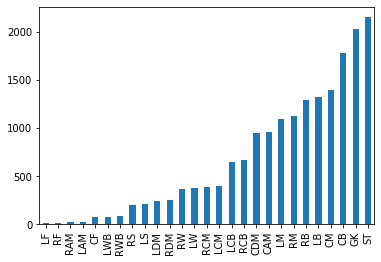

In [48]:
fifa1.Position.value_counts(ascending=True).plot(kind='bar')

In [23]:
#QUESTION2)

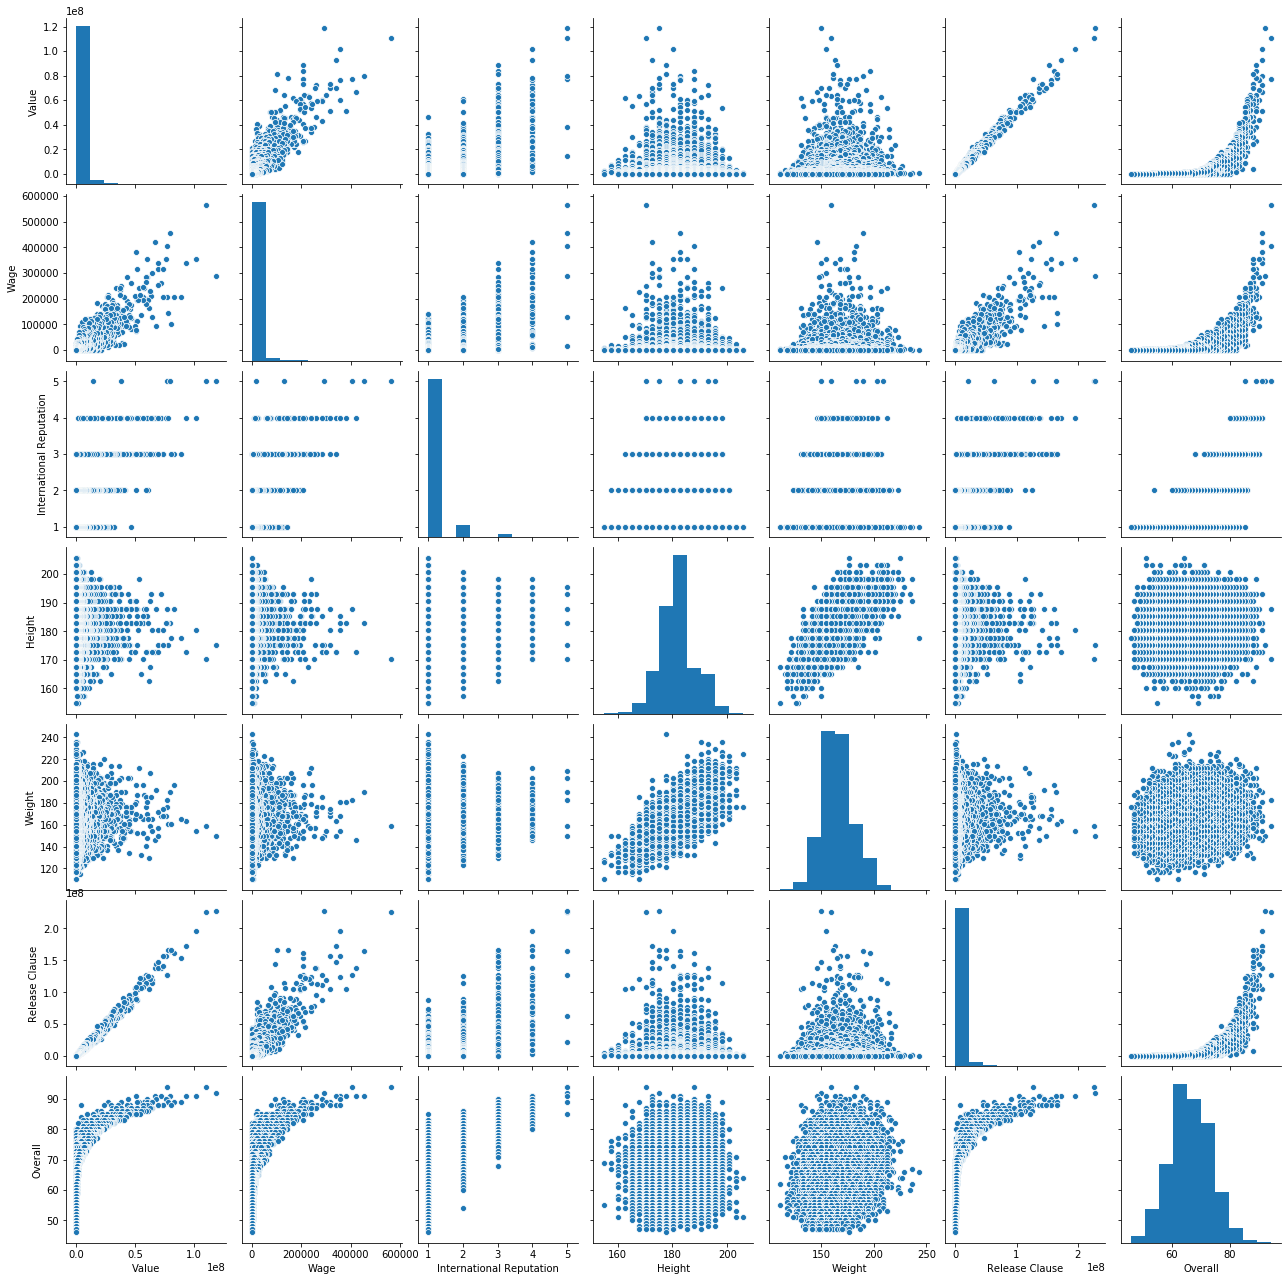

In [50]:
sns.pairplot(fifa1[[ 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause','Overall']])

In [25]:
fifa1.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Contract Valid Until Year'],
      dtype='object')

In [26]:
#top overall players with contracts expiring in 2020
top20=fifa1[fifa1['Contract Valid Until Year']==2020][:20]
#only 17 people exist in the dataframe

In [27]:
#QA)
#average wages of these 17 people:
top20.Wage.mean()

205150.0

In [28]:
#QB)
top20.Age.mean()

29.95

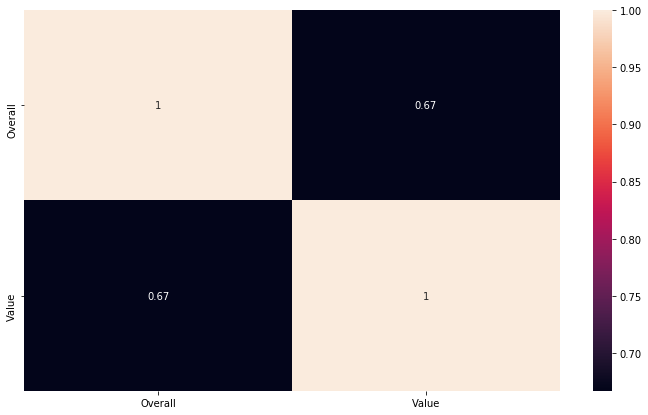

In [29]:
#QC)
plt.figure(figsize=(12,7))
sns.heatmap(top20[['Overall','Value']].corr(),annot=True)
plt.show()
#as we can see, there is 0.67 correlation bettween overall and value

In [5]:
fifa1['Position'].fillna('Not Specified',inplace=True)

In [52]:
#Q4)
#top 5 players in each position
top5=fifa1.groupby('Position').head(5).set_index('Position').sort_values('Position')

In [53]:
top5

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
Position,,,,,,,,,,,,,,,,,,,,,
CAM,31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2020.0
CAM,66,189596,T. Müller,28,https://cdn.sofifa.org/players/4/19/189596.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,FC Bayern München,...,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0,2021.0
CAM,61,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,87,Liverpool,...,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0,2023.0
CAM,74,176635,M. Özil,29,https://cdn.sofifa.org/players/4/19/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Arsenal,...,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0,2021.0
CAM,17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,...,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,NaN,...,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0,NaN,NaN
NaN,6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,NaN,...,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0,NaN,NaN
NaN,7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,NaN,...,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0,NaN,NaN


In [ ]:
top5.drop('Not Specified',inplace=True)
#dropping players whose position in unknown

In [55]:
#Q4b)
pd.pivot_table(top5,index='Position',aggfunc='mean')['Wage']
#Average wages of top 5 players in each position


Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

Text(0, 0.5, 'Avg RC(TOP 5 PLAYERS)')

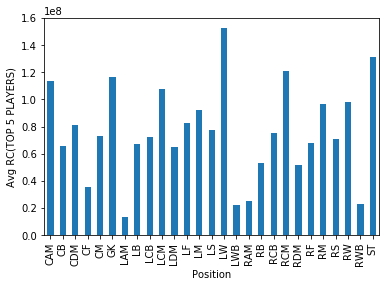

In [61]:
pd.pivot_table(top5,index='Position',aggfunc='mean')['Release Clause'].plot(kind='bar')
plt.ylabel('Avg RC(TOP 5 PLAYERS)')


In [38]:
top5[top5.duplicated('Name')]
#no players with duplicate entries

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
Position,,,,,,,,,,,,,,,,,,,,,
